# Evolutionary computation 
# Robot development using GA


Fenotype is maze map   
Genotype is array (size 14)  
Population: 100  
Mutation probability: 0.1%    
Crossover probability: 70%  
Terminal conditions: 100 generations  
Operators:  
Crossover: Single point crossover    
Mutation: One point mutation  
Selection: Tournament selection 

In [7]:
import random
import numpy
from deap import algorithms,base,creator,tools
import time
import math
import matplotlib.pyplot as plt

# _________________DATA___________________________

spaces = 14
start_x,start_y=(1,0)
finish_x,finish_y=(2,6)
direction=['up','down','left','right']

maze = [
    ['W', 'W', 'W', 'W', 'W', 'W', 'W'],
    ['O', 'O', 'W', 'O', 'O', 'O', 'W'],
    ['W', 'O', 'W', 'O', 'W', 'O', 'O'],
    ['W', 'O', 'O', 'O', 'O', 'O', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'W', 'W']
       ]

# ______________MUTATION____________________________

def one_point_mut(individual):
    index=random.sample(range(len(individual)),1)[0]
    variation=[x for x in direction if x!=individual[index]]
    (individual[index])=random.sample(variation,1)[0]
    return (individual,)

# ________________FITNESS__________________________

def evaluation(individual):
    coor_x,coor_y=start_x,start_y
    dead=0
    step=0
    for i in individual:
        if i=='up':
            step+=1
            point=coor_x-1
            if maze[point][coor_y]=='W':
                dead+=1
                continue
            elif maze[point][coor_y]=='O':
                coor_x=point   
        if i=='down':
            step+=1
            point=coor_x+1
            if maze[point][coor_y]=='W':
                dead+=1
                continue
            elif maze[point][coor_y]=='O':
                coor_x=point
        if i=='left':
            step+=1
            point=coor_y-1
            if point<0:
                dead+=1
                continue
            if maze[coor_x][point]=='W':
                dead+=1
                continue
            elif maze[coor_x][point]=='O':
                coor_y=point
        if i=='right':
            step+=1
            point=coor_y+1
            if maze[coor_x][point]=='W':
                dead+=1
                continue
            elif maze[coor_x][point]=='O':
                coor_y=point
        if (coor_x,coor_y)==(finish_x,finish_y): 
            break
    distance=math.sqrt((coor_x-finish_x)**2+(coor_y-finish_y)**2)
    return((step+dead)*distance,)        

# ________________MAIN__________________________

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("array", random.choice, direction)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.array,n=spaces)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluation)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", one_point_mut)
toolbox.register("select", tools.selTournament, tournsize=3)

pop = toolbox.population(n=100)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Average", numpy.mean)
stats.register("Median", numpy.median)
stats.register("Min", numpy.min)
stats.register("Max", numpy.max)

before = time.time()
a,v=algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.001, ngen=100, stats=stats,
                            halloffame=hof, verbose=True)
after=time.time() 
avg=v.select("Average")
md=v.select("Median")
mn=v.select("Min")
mx=v.select("Max")
gen=v.select("gen")
print('Algorithms time',after-before)   


gen	nevals	Average	Median	Min	Max    
0  	100   	119.434	120   	20 	170.317
1  	78    	102.688	107.079	20 	170.317
2  	64    	85.9602	96.8814	18 	145.986
3  	82    	67.4235	60.0833	18 	133.821
4  	72    	47.0088	40.2492	0  	120    
5  	66    	34.2229	26.8701	0  	127.475
6  	64    	23.9143	20     	0  	107.079
7  	70    	18.4147	18     	0  	117.277
8  	62    	11.7787	17     	0  	44.7214
9  	68    	5.89604	0      	0  	117.277
10 	74    	0.777817	0      	0  	26.8701
11 	68    	0.565685	0      	0  	29.6985
12 	64    	1.92231 	0      	0  	117.277
13 	70    	1.65361 	0      	0  	117.277
14 	78    	0.480833	0      	0  	24.0416
15 	72    	0       	0      	0  	0      
16 	64    	0.59397 	0      	0  	29.6985
17 	84    	0.296985	0      	0  	29.6985
18 	84    	0.509117	0      	0  	26.8701
19 	74    	0.240416	0      	0  	24.0416
20 	70    	0       	0      	0  	0      
21 	60    	0       	0      	0  	0      
22 	70    	0.777817	0      	0  	29.6985
23 	78    	0.268701	0      	0  	26.8701
24 	70    	0.

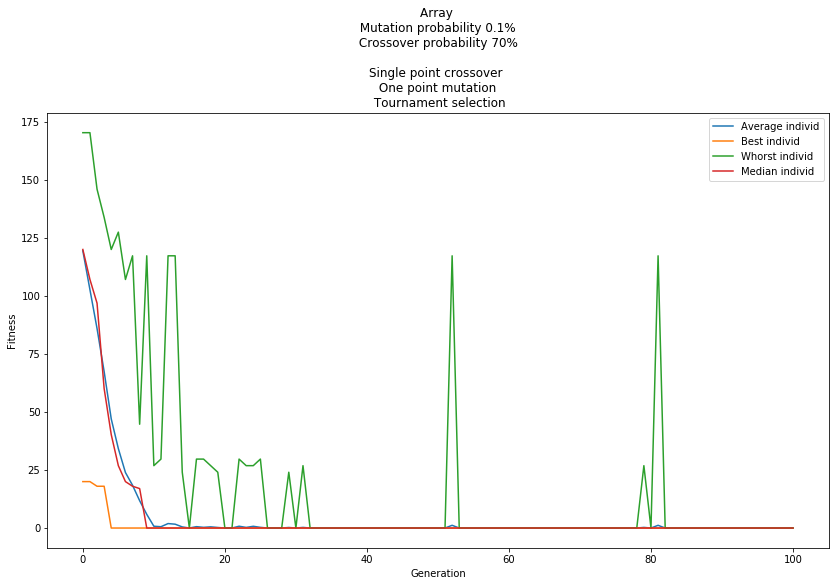

In [8]:
fig, ax = plt.subplots(figsize = (14, 8))
line_avg = ax.plot(gen, avg, label='Average individ')
line_max = ax.plot(gen, mn, label='Best individ')
line_min = ax.plot(gen, mx, label='Whorst individ')
line_md = ax.plot(gen, md, label='Median individ')
ax.legend()
plt.xlabel("Generation")
plt.ylabel("Fitness")
ax.set_title('''Array \n Mutation probability 0.1% \n Crossover probability 70% \n  
Single point crossover \n One point mutation \n Tournament selection''')
plt.show()

In [9]:
print(hof[0])

['right', 'down', 'right', 'down', 'right', 'down', 'right', 'down', 'left', 'right', 'right', 'right', 'up', 'right']


In [10]:
maze = [
    ['W', 'W', 'W', 'W', 'W', 'W', 'W'],
    ['O', 'O', 'W', 'O', 'O', 'O', 'W'],
    ['W', 'O', 'W', 'O', 'W', 'O', 'O'],
    ['W', 'O', 'O', 'O', 'O', 'O', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'W', 'W']
       ]